In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules 

### Import csv file as panda data frame

In [25]:
df=pd.read_csv('Employee_skills_traits.csv')
df

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     998 non-null    int64
 1   Employment period                      998 non-null    int64
 2   Time in current department             998 non-null    int64
 3   Gender                                 998 non-null    int64
 4   Team leader                            998 non-null    int64
 5   Age                                    998 non-null    int64
 6   Member of professional organizations   998 non-null    int64
 7   .Net                                   998 non-null    int64
 8   SQL Server                             998 non-null    int64
 9   HTML CSS Java Script                   998 non-null    int64
 10  PHP mySQL                              998 non-null    int64
 11  Fast working                    

### Drop null values

In [27]:
df2=df.dropna()
df2

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [28]:
df2.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     998 non-null    int64
 1   Employment period                      998 non-null    int64
 2   Time in current department             998 non-null    int64
 3   Gender                                 998 non-null    int64
 4   Team leader                            998 non-null    int64
 5   Age                                    998 non-null    int64
 6   Member of professional organizations   998 non-null    int64
 7   .Net                                   998 non-null    int64
 8   SQL Server                             998 non-null    int64
 9   HTML CSS Java Script                   998 non-null    int64
 10  PHP mySQL                              998 non-null    int64
 11  Fast working                    

In [30]:
df2.describe()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,9710.248497,10.388778,5.660321,0.484970,0.504008,40.441884,0.48998,0.476954,0.475952,0.508016,0.477956,0.503006,0.502004,0.521042
std,5639.386232,5.787715,3.196953,0.500025,0.500235,8.059964,0.50015,0.499719,0.499672,0.500186,0.499764,0.500242,0.500247,0.499808
min,235.000000,1.000000,1.000000,0.000000,0.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4878.500000,5.000000,3.000000,0.000000,0.000000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9413.000000,10.000000,5.000000,0.000000,1.000000,40.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,14619.750000,15.000000,8.000000,1.000000,1.000000,47.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,20078.000000,20.000000,12.000000,1.000000,1.000000,55.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df2['ID'].value_counts()

4338     2
16414    2
5186     2
11085    2
17000    2
        ..
17959    1
17695    1
8858     1
13595    1
18432    1
Name: ID, Length: 974, dtype: int64

### Drop duplicate records

In [32]:
df2.drop_duplicates(subset = 'ID', keep = 'first', inplace = True)
df2

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


In [33]:
df2['ID'].value_counts()

6141     1
7648     1
10972    1
8923     1
3813     1
        ..
9523     1
7473     1
19754    1
7465     1
18432    1
Name: ID, Length: 974, dtype: int64

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   ID                                     974 non-null    int64
 1   Employment period                      974 non-null    int64
 2   Time in current department             974 non-null    int64
 3   Gender                                 974 non-null    int64
 4   Team leader                            974 non-null    int64
 5   Age                                    974 non-null    int64
 6   Member of professional organizations   974 non-null    int64
 7   .Net                                   974 non-null    int64
 8   SQL Server                             974 non-null    int64
 9   HTML CSS Java Script                   974 non-null    int64
 10  PHP mySQL                              974 non-null    int64
 11  Fast working                    

### Data Analysis - Employment period

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fbbc310>]],
      dtype=object)

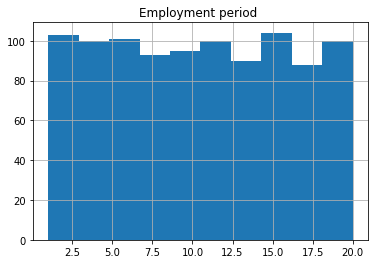

In [35]:
df2.hist(column='Employment period ')

In [36]:
df2['Employment period '].describe()

count    974.000000
mean      10.383984
std        5.803602
min        1.000000
25%        5.000000
50%       10.000000
75%       15.000000
max       20.000000
Name: Employment period , dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1205cd310>,
 'caps': [<matplotlib.lines.Line2D at 0x1205dfc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1205d7550>],
 'medians': [<matplotlib.lines.Line2D at 0x1205e86d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1205e8bd0>],
 'means': []}

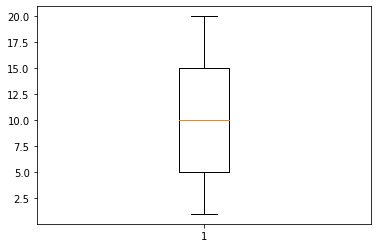

In [37]:
plt.boxplot(df2['Employment period '])

### Data Analysis - Time in current department

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1205dfbd0>]],
      dtype=object)

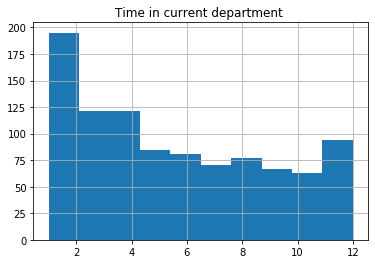

In [38]:
df2.hist(column='Time in current department ')

In [39]:
df2['Time in current department '].describe()

count    974.000000
mean       5.666324
std        3.206903
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: Time in current department , dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1207bd610>,
 'caps': [<matplotlib.lines.Line2D at 0x1207c2cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1207bd5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1207cc750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1207ccc50>],
 'means': []}

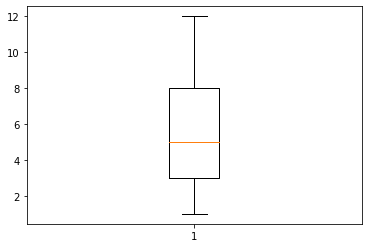

In [40]:
plt.boxplot(df2['Time in current department '])

### Data Analysis - Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1206f9a50>]],
      dtype=object)

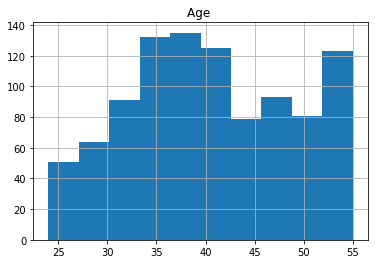

In [41]:
df2.hist(column='Age ')

In [42]:
df2['Age '].describe()

count    974.000000
mean      40.468172
std        8.080181
min       24.000000
25%       34.000000
50%       40.000000
75%       47.000000
max       55.000000
Name: Age , dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1209852d0>,
 'caps': [<matplotlib.lines.Line2D at 0x120998bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x120990490>],
 'medians': [<matplotlib.lines.Line2D at 0x12099f650>],
 'fliers': [<matplotlib.lines.Line2D at 0x12099fb50>],
 'means': []}

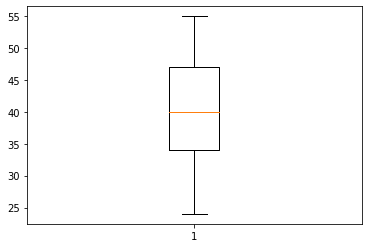

In [43]:
plt.boxplot(df2['Age '])

In [44]:
df2.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

### Data Analysis - Gender

In [45]:
df2['Gender '].value_counts()

0    502
1    472
Name: Gender , dtype: int64

### Data Analysis - Team leader

In [46]:
df2['Team leader '].value_counts()

1    491
0    483
Name: Team leader , dtype: int64

### Data Analysis - Member of professional organizations

In [47]:
df2['Member of professional organizations '].value_counts()

0    494
1    480
Name: Member of professional organizations , dtype: int64

### Data Analysis - .Net

In [48]:
df2['.Net '].value_counts()

0    511
1    463
Name: .Net , dtype: int64

### Data Analysis - SQL Server

In [49]:
df2['SQL Server '].value_counts()

0    509
1    465
Name: SQL Server , dtype: int64

### Data Analysis - HTML CSS Java Script

In [50]:
df2['HTML CSS Java Script '].value_counts()

1    497
0    477
Name: HTML CSS Java Script , dtype: int64

### Data Analysis - PHP mySQL

In [51]:
df2['PHP mySQL '].value_counts()

0    509
1    465
Name: PHP mySQL , dtype: int64

### Data Analysis - Fast working

In [52]:
df2['Fast working'].value_counts()

1    493
0    481
Name: Fast working, dtype: int64

### Data Analysis - Awards

In [53]:
df2['Awards'].value_counts()

1    490
0    484
Name: Awards, dtype: int64

### Data Analysis - Communicative

In [54]:
df2['Communicative '].value_counts()

1    508
0    466
Name: Communicative , dtype: int64

In [55]:
df2.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

### Data Analysis - Age & Employment period

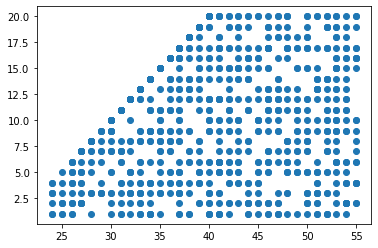

In [56]:
fig, ax = plt.subplots()
ax.scatter(df2['Age '], df2['Employment period '])
plt.show()

In [57]:
df2['Age '].corr(df['Employment period '])

0.16561981982286003

### Data Analysis - Age & Time in current department

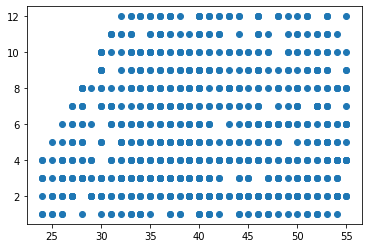

In [58]:
fig, ax = plt.subplots()
ax.scatter(df2['Age '], df2['Time in current department '])
plt.show()

In [59]:
df2['Age '].corr(df['Time in current department '])

0.07492866973858787

### Data Analysis - Employment period & Time in current department

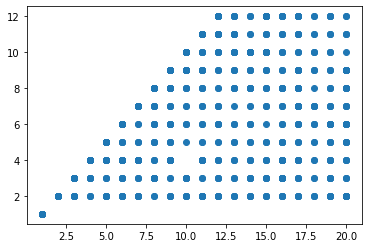

In [60]:
fig, ax = plt.subplots()
ax.scatter(df2['Employment period '], df2['Time in current department '])
plt.show()

In [61]:
df2['Employment period '].corr(df['Time in current department '])

0.4959277446659776

In [62]:
df2.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative '],
      dtype='object')

### Data Transformation - Binning

In [63]:
cut_labels_4 = ['entry', 'mid', 'sr', 'exec']
cut_bins = [1, 3, 8, 15, 20]
df2['cut_Employment period'] = pd.cut(df2['Employment period '], bins=cut_bins, labels=cut_labels_4)
df2

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment period
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid


In [64]:
cut_labels_4 = ['fresher', 'senior', 'experienced']
cut_bins = [1, 2, 8, 12]
df2['cut_Time in current department'] = pd.cut(df2['Time in current department '], bins=cut_bins, labels=cut_labels_4)
df2

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment period,cut_Time in current department
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid,senior
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid,senior
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr,senior
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid,senior
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec,senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr,senior
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec,senior
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr,senior
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid,senior


In [65]:
cut_labels_4 = ['youngster', 'middle_aged', 'old']
cut_bins = [24, 30, 50, 55]
df2['cut_Age'] = pd.cut(df2['Age '], bins=cut_bins, labels=cut_labels_4)
df2

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment period,cut_Time in current department,cut_Age
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1,mid,senior,middle_aged
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0,mid,senior,youngster
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1,sr,senior,middle_aged
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0,mid,senior,youngster
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1,exec,senior,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1,sr,senior,middle_aged
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1,exec,senior,middle_aged
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0,sr,senior,middle_aged
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1,mid,senior,middle_aged


### Data Transformation (conversion)

In [66]:
df3 = pd.get_dummies(df2)
df3

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,...,cut_Employment period_entry,cut_Employment period_mid,cut_Employment period_sr,cut_Employment period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
0,6723,5,4,0,1,48,1,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,8923,5,3,1,1,26,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
3,235,7,5,1,1,27,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,9523,18,8,0,0,38,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
994,12133,16,8,1,0,36,1,1,1,0,...,0,0,0,1,0,1,0,0,1,0
995,854,11,4,0,1,34,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
996,13444,8,8,1,0,36,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [67]:
df3.columns

Index(['ID', 'Employment period ', 'Time in current department ', 'Gender ',
       'Team leader ', 'Age ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative ',
       'cut_Employment period_entry', 'cut_Employment period_mid',
       'cut_Employment period_sr', 'cut_Employment period_exec',
       'cut_Time in current department_fresher',
       'cut_Time in current department_senior',
       'cut_Time in current department_experienced', 'cut_Age_youngster',
       'cut_Age_middle_aged', 'cut_Age_old'],
      dtype='object')

### Dimensionality Reduction

In [68]:
ip = df3.drop(['ID', 'Employment period ', 'Time in current department ', 'Age '], 1)
ip

,Gender,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment period_entry,cut_Employment period_mid,cut_Employment period_sr,cut_Employment period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
0,0,1,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0
1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,1,1,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
4,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0
994,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
995,0,1,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0


In [69]:
ip.describe()

,Gender,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,cut_Employment period_entry,cut_Employment period_mid,cut_Employment period_sr,cut_Employment period_exec,cut_Time in current department_fresher,cut_Time in current department_senior,cut_Time in current department_experienced,cut_Age_youngster,cut_Age_middle_aged,cut_Age_old
count,974.00000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.48460,0.504107,0.492813,0.475359,0.477413,0.510267,0.477413,0.506160,0.503080,0.521561,0.108830,0.246407,0.342916,0.249487,0.147844,0.569815,0.229979,0.109856,0.725873,0.156057
std,0.50002,0.500240,0.500205,0.499649,0.499746,0.500151,0.499746,0.500219,0.500247,0.499792,0.311585,0.431139,0.474928,0.432938,0.355128,0.495356,0.421036,0.312871,0.446303,0.363096
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
ip.columns

Index(['Gender ', 'Team leader ', 'Member of professional organizations ',
       '.Net ', 'SQL Server ', 'HTML CSS Java Script ', 'PHP mySQL ',
       'Fast working', 'Awards', 'Communicative ',
       'cut_Employment period_entry', 'cut_Employment period_mid',
       'cut_Employment period_sr', 'cut_Employment period_exec',
       'cut_Time in current department_fresher',
       'cut_Time in current department_senior',
       'cut_Time in current department_experienced', 'cut_Age_youngster',
       'cut_Age_middle_aged', 'cut_Age_old'],
      dtype='object')

In [71]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 997
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Gender                                      974 non-null    int64
 1   Team leader                                 974 non-null    int64
 2   Member of professional organizations        974 non-null    int64
 3   .Net                                        974 non-null    int64
 4   SQL Server                                  974 non-null    int64
 5   HTML CSS Java Script                        974 non-null    int64
 6   PHP mySQL                                   974 non-null    int64
 7   Fast working                                974 non-null    int64
 8   Awards                                      974 non-null    int64
 9   Communicative                               974 non-null    int64
 10  cut_Employment period_entry           

### Generate Frequent Items

In [72]:
frq_items = apriori(ip, min_support = 0.25, use_colnames = True)
frq_items

,support,itemsets
0,0.484600,(Gender )
1,0.504107,(Team leader )
2,0.492813,(Member of professional organizations )
3,0.475359,(.Net )
4,0.477413,(SQL Server )
5,0.510267,(HTML CSS Java Script )
6,0.477413,(PHP mySQL )
7,0.506160,(Fast working)
8,0.503080,(Awards)
9,0.521561,(Communicative )


### Generate Association Rules

In [73]:
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(cut_Employment period_sr),(cut_Age_middle_aged),0.342916,0.725873,0.261807,0.763473,1.051800,0.012894,1.158969
37,(Fast working),(cut_Age_middle_aged),0.506160,0.725873,0.376797,0.744422,1.025554,0.009389,1.072577
15,(.Net ),(cut_Age_middle_aged),0.475359,0.725873,0.351129,0.738661,1.017618,0.006079,1.048933
33,(PHP mySQL ),(cut_Age_middle_aged),0.477413,0.725873,0.349076,0.731183,1.007315,0.002535,1.019754
35,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046


### Define functions

In [74]:
def get_frq_items(min_support):
    return apriori(ip, min_support, use_colnames = True)

In [75]:
def get_association_rules(frq_items):
    rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
    return rules.sort_values(['confidence', 'lift'], ascending =[False, False])

In [76]:
def execute(min_support):
    frq_items = get_frq_items(min_support)
    # print(frq_items.head())
    rules = get_association_rules(frq_items)
    return rules

### Iterate

In [77]:
execute(0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
878,"(Communicative , cut_Employment period_mid)",(cut_Time in current department_senior),0.135524,0.569815,0.128337,0.946970,1.661889,0.051113,8.112056
624,"(cut_Employment period_mid, .Net )",(cut_Time in current department_senior),0.128337,0.569815,0.119097,0.928000,1.628598,0.045968,5.974789
276,"(Gender , cut_Employment period_mid)",(cut_Time in current department_senior),0.125257,0.569815,0.116016,0.926230,1.625491,0.044643,5.831394
433,"(cut_Employment period_mid, Team leader )",(cut_Time in current department_senior),0.121150,0.569815,0.111910,0.923729,1.621102,0.042877,5.640201
836,"(cut_Employment period_mid, Fast working)",(cut_Time in current department_senior),0.136550,0.569815,0.125257,0.917293,1.609808,0.047448,5.201325
...,...,...,...,...,...,...,...,...,...
287,(cut_Age_middle_aged),"(Gender , cut_Employment period_exec)",0.725873,0.127310,0.107803,0.148515,1.166560,0.015392,1.024903
1009,(cut_Age_middle_aged),"(cut_Time in current department_senior, Fast w...",0.725873,0.146817,0.106776,0.147100,1.001929,0.000206,1.000332
442,(cut_Age_middle_aged),"(Team leader , cut_Employment period_exec)",0.725873,0.120123,0.105749,0.145686,1.212805,0.018555,1.029922
917,(cut_Age_middle_aged),"(cut_Time in current department_senior, Gender...",0.725873,0.140657,0.102669,0.141443,1.005585,0.000570,1.000915


In [78]:
execute(0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(cut_Employment period_mid),(cut_Time in current department_senior),0.246407,0.569815,0.222793,0.904167,1.586772,0.082386,4.488885
67,(cut_Employment period_exec),(cut_Age_middle_aged),0.249487,0.725873,0.211499,0.847737,1.167886,0.030403,1.800350
65,(cut_Employment period_sr),(cut_Age_middle_aged),0.342916,0.725873,0.261807,0.763473,1.051800,0.012894,1.158969
59,(Fast working),(cut_Age_middle_aged),0.506160,0.725873,0.376797,0.744422,1.025554,0.009389,1.072577
78,"(cut_Time in current department_senior, Fast w...",(cut_Age_middle_aged),0.304928,0.725873,0.226899,0.744108,1.025122,0.005560,1.071261
...,...,...,...,...,...,...,...,...,...
70,(Communicative ),"(cut_Age_middle_aged, Team leader )",0.521561,0.358316,0.201232,0.385827,1.076777,0.014348,1.044793
64,(cut_Age_middle_aged),(cut_Employment period_sr),0.725873,0.342916,0.261807,0.360679,1.051800,0.012894,1.027784
74,(cut_Time in current department_senior),"(cut_Age_middle_aged, Member of professional o...",0.569815,0.351129,0.202259,0.354955,1.010895,0.002180,1.005931
79,(cut_Age_middle_aged),"(cut_Time in current department_senior, Fast w...",0.725873,0.304928,0.226899,0.312588,1.025122,0.005560,1.011144


In [79]:
execute(0.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(cut_Employment period_sr),(cut_Age_middle_aged),0.342916,0.725873,0.261807,0.763473,1.051800,0.012894,1.158969
37,(Fast working),(cut_Age_middle_aged),0.506160,0.725873,0.376797,0.744422,1.025554,0.009389,1.072577
15,(.Net ),(cut_Age_middle_aged),0.475359,0.725873,0.351129,0.738661,1.017618,0.006079,1.048933
33,(PHP mySQL ),(cut_Age_middle_aged),0.477413,0.725873,0.349076,0.731183,1.007315,0.002535,1.019754
35,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046
39,(Communicative ),(cut_Time in current department_senior),0.521561,0.569815,0.308008,0.590551,1.036391,0.010815,1.050644
3,(Gender ),(cut_Time in current department_senior),0.484600,0.569815,0.285421,0.588983,1.033639,0.009289,1.046635
11,(Member of professional organizations ),(cut_Time in current department_senior),0.492813,0.569815,0.288501,0.585417,1.027380,0.007689,1.037632
13,(.Net ),(cut_Time in current department_senior),0.475359,0.569815,0.278234,0.585313,1.027198,0.007367,1.037373
21,(SQL Server ),(cut_Time in current department_senior),0.477413,0.569815,0.278234,0.582796,1.022780,0.006197,1.031113


In [80]:
execute(0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Fast working),(cut_Age_middle_aged),0.506160,0.725873,0.376797,0.744422,1.025554,0.009389,1.072577
1,(.Net ),(cut_Age_middle_aged),0.475359,0.725873,0.351129,0.738661,1.017618,0.006079,1.048933
3,(PHP mySQL ),(cut_Age_middle_aged),0.477413,0.725873,0.349076,0.731183,1.007315,0.002535,1.019754
5,(Fast working),(cut_Time in current department_senior),0.506160,0.569815,0.304928,0.602434,1.057245,0.016510,1.082046
9,(Communicative ),(cut_Time in current department_senior),0.521561,0.569815,0.308008,0.590551,1.036391,0.010815,1.050644
8,(cut_Time in current department_senior),(Communicative ),0.569815,0.521561,0.308008,0.540541,1.036391,0.010815,1.041309
4,(cut_Time in current department_senior),(Fast working),0.569815,0.506160,0.304928,0.535135,1.057245,0.016510,1.062330
6,(cut_Age_middle_aged),(Fast working),0.725873,0.506160,0.376797,0.519095,1.025554,0.009389,1.026896
0,(cut_Age_middle_aged),(.Net ),0.725873,0.475359,0.351129,0.483734,1.017618,0.006079,1.016222
2,(cut_Age_middle_aged),(PHP mySQL ),0.725873,0.477413,0.349076,0.480905,1.007315,0.002535,1.006728


In [81]:
execute(0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [82]:
execute(0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [83]:
execute(0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


### END